## **Clasificación utilizando LightGBM (Core)**


### **Objetivo**

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando LightGBM (LGBM). Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

### **Descripción del Dataset:**
El dataset de predicción de préstamos contiene información sobre solicitantes de préstamos, como sus ingresos, historial crediticio y otras características personales. El objetivo es predecir si un solicitante será aprobado para un préstamo basándose en estos factores.

---

### **Instrucciones:**

### **Parte 1:** Carga y Exploración Inicial de Datos

- ***Carga del Dataset:***

    - Cargar el dataset desde Kaggle.

- ***Exploración Inicial:***

    - Revisar la estructura del dataset.

    - Describir las variables y su distribución.

    - Identificar y documentar valores faltantes y outliers.

### **Parte 2:** Análisis Exploratorio de Datos (EDA)

- **Análisis Estadístico Descriptivo:**

    - Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).

    - Analizar la distribución de las variables categóricas.
- ***Visualizaciones:***

    - Crear histogramas y gráficos de barras para entender la distribución de las variables.

    - Crear un mapa de calor para visualizar las correlaciones entre las variables.

    - Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

- ***Valores Faltantes y Outliers:***

    - Detectar y tratar valores faltantes.

    - Identificar y manejar outliers.

### **Parte 3:** Preprocesamiento de Datos

- ***Transformación de Columnas:***

    - Codificar variables categóricas utilizando One-Hot Encoding.

    - Escalar características numéricas utilizando StandardScaler.

- ***División del Conjunto de Datos:***

    - Dividir el dataset en conjuntos de entrenamiento y prueba.

### **Parte 4:** Implementación de LightGBM (LGBM)

- ***Entrenamiento del Modelo:***

    - Entrenar un modelo de LGBM con hiperparámetros básicos.

    - Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

- ***Optimización de Hiperparámetros:***

    - Utilizar GridSearchCV para optimizar los hiperparámetros del     modelo de LGBM.

- ***Evaluación del Modelo Optimizado:***

    - Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.


In [1]:
import pandas as pd

# Cargar el dataset
ruta_archivo = r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\loan_predict.csv'
data = pd.read_csv(ruta_archivo)

# Caracterización del dataset
print("Forma del dataset (filas, columnas):", data.shape)
print("\nNombres de las columnas:", data.columns.tolist())
print("\nTipos de datos de cada columna:")
print(data.dtypes)
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Contar duplicados
print("\nNúmero de filas duplicadas:", data.duplicated().sum())

# Separar columnas numéricas y categóricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(data[columnas_numericas].describe())

# Información adicional para columnas numéricas
print("\nValores únicos en columnas numéricas:")
for col in columnas_numericas:
    print(f"{col}: {data[col].nunique()} valores únicos")

# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas para columnas categóricas:")
print(data[columnas_categoricas].describe())

# Información adicional para columnas categóricas
print("\nFrecuencia de valores en columnas categóricas:")
for col in columnas_categoricas:
    print(f"\n{col}:")
    print(data[col].value_counts())


Forma del dataset (filas, columnas): (614, 13)

Nombres de las columnas: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Tipos de datos de cada columna:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Valores nulos por columna:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_A

In [2]:
# Identificar las columnas categóricas
columnas_categoricas = ['Dependents', 'Education', 'Property_Area']

# Eliminar las filas que contienen NaN en las columnas categóricas
data = data.dropna(subset=columnas_categoricas)

# Verificar los cambios
print("\nNúmero de filas después de eliminar NaN en columnas categóricas:", data.shape[0])

# Verificar que las columnas categóricas ya no tienen valores NaN
print("\nValores nulos por columna después de la eliminación:")
print(data[columnas_categoricas].isnull().sum())

# Identificar las columnas numéricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Imputar valores nulos en columnas numéricas usando la media o la mediana
for col in columnas_numericas:
    if data[col].isnull().sum() > 0:  # Solo imputar si hay valores nulos
        # Verificar la distribución de la columna
        # Si la columna tiene una distribución sesgada, usamos la mediana
        if abs(data[col].skew()) > 1:  # Si el sesgo es mayor a 1, usar mediana
            data[col] = data[col].fillna(data[col].median())
        else:  # Si la distribución es simétrica, usar la media
            data[col] = data[col].fillna(data[col].mean())

# Verificar que ya no hay valores nulos en las columnas numéricas
print("\nValores nulos por columna después de imputación:")
print(data[columnas_numericas].isnull().sum())


Número de filas después de eliminar NaN en columnas categóricas: 599

Valores nulos por columna después de la eliminación:
Dependents       0
Education        0
Property_Area    0
dtype: int64

Valores nulos por columna después de imputación:
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [3]:
# Transformar `Loan_ID` a string
data['Loan_ID'] = data['Loan_ID'].astype(str)

# Convertir las columnas que corresponden a tipo categoría
columnas_categoricas = ['Dependents', 'Education', 'Property_Area']
data[columnas_categoricas] = data[columnas_categoricas].astype('category')

# Convertir las columnas con "Yes"/"No" o "Y"/"N" a booleanas
columns_yes_no = ['Married', 'Self_Employed']
columns_y_n = ['Loan_Status']  # Columna con "Y"/"N"

# Asegurarse de que las columnas sean de tipo string antes de aplicar operaciones .str
for col in columns_yes_no + columns_y_n:
    if col in data.columns:
        # Aseguramos que las columnas sean de tipo str
        data[col] = data[col].astype(str).str.strip().str.capitalize()  # Normalizamos los valores
        data[col] = data[col].map({'Yes': True, 'No': False, 'Y': True, 'N': False})

# Convertir a tipo bool
data[columns_yes_no + columns_y_n] = data[columns_yes_no + columns_y_n].astype(bool)

# Verificar los tipos de datos después de la transformación
print("\nTipos de datos después de la transformación:")
print(data.dtypes)


Tipos de datos después de la transformación:
Loan_ID                object
Gender                 object
Married                  bool
Dependents           category
Education            category
Self_Employed            bool
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status              bool
dtype: object



Estadísticas Descriptivas Básicas:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       599.000000         599.000000  599.000000        599.000000   
mean       5408.864775        1634.896361  146.188648        342.070117   
std        6168.473138        2953.144575   84.954303         64.221516   
min         150.000000           0.000000    9.000000         12.000000   
25%        2853.000000           0.000000  100.000000        360.000000   
50%        3775.000000        1213.000000  128.000000        360.000000   
75%        5816.500000        2304.000000  165.500000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      599.000000  
mean         0.859766  
std          0.347520  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Valores Mínimos y Máximos de las Variables Numéricas:
     ApplicantInc

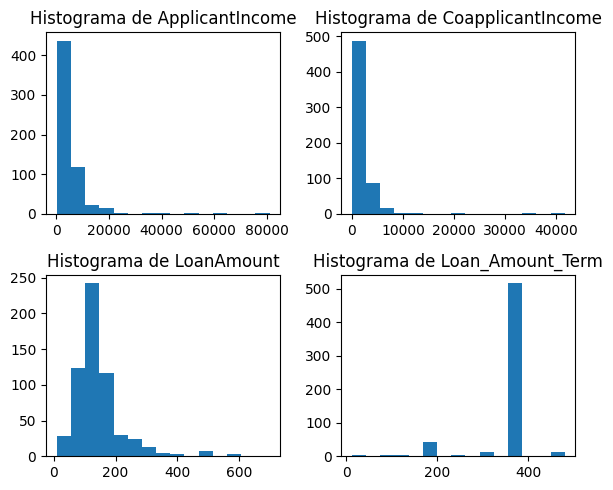

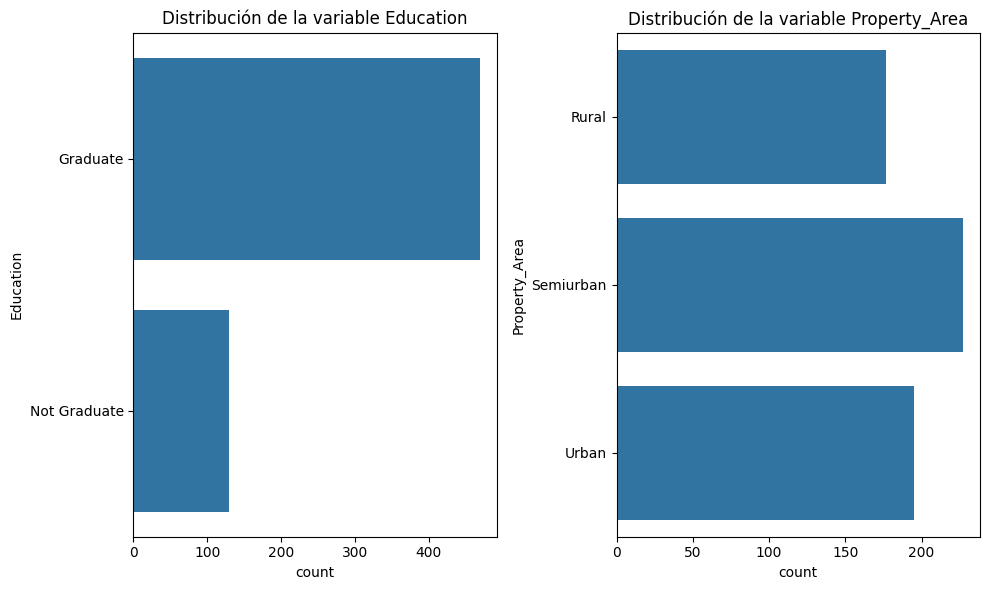

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Identificar columnas por tipo
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = data.select_dtypes(include=['category']).columns
columnas_bool = data.select_dtypes(include=['bool']).columns

# Filtrar las columnas a utilizar en los gráficos
columnas_numericas = [col for col in columnas_numericas if col not in ['Credit_History']] 
columnas_categoricas = [col for col in columnas_categoricas if col not in ['Dependents']] 
columnas_numericas_boxplots = [col for col in columnas_numericas if col not in ['Credit_History', 'Loan_Amount_Term']]

# Análisis Estadístico Descriptivo

# Calcular estadísticas descriptivas básicas para las columnas numéricas
estadisticas = data.describe()
print("\nEstadísticas Descriptivas Básicas:")
print(estadisticas)

# Mostrar valores mínimo y máximo para cada columna numérica
print("\nValores Mínimos y Máximos de las Variables Numéricas:")
print(estadisticas.loc[['min', 'max']])

# Visualizaciones

# Crear histogramas para entender la distribución de las variables numéricas (solo 4 sin Credit_History)
n = len(columnas_numericas)
n_cols = 2
n_rows = (n // 2) + (n % 2) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 5))
axes = axes.flatten()

# Crear histogramas para cada columna numérica
for i, col in enumerate(columnas_numericas):
    axes[i].hist(data[col], bins=15)
    axes[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

# Gráfico de barras para analizar la distribución de las variables categóricas (solo 2 sin Dependents)
fig, axes = plt.subplots(len(columnas_categoricas) // 2 + len(columnas_categoricas) % 2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(columnas_categoricas):
    sns.countplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribución de la variable {col}')

plt.tight_layout()
plt.show()

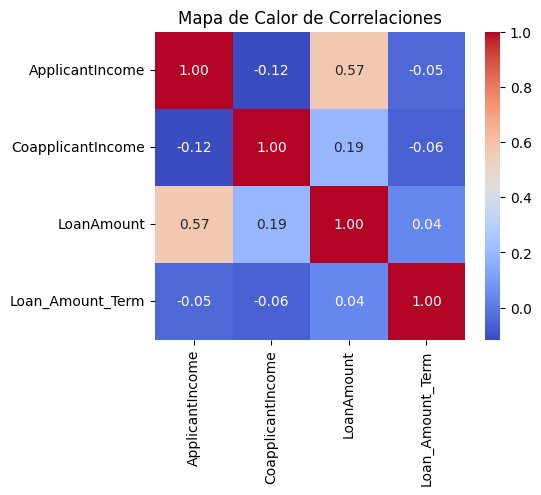

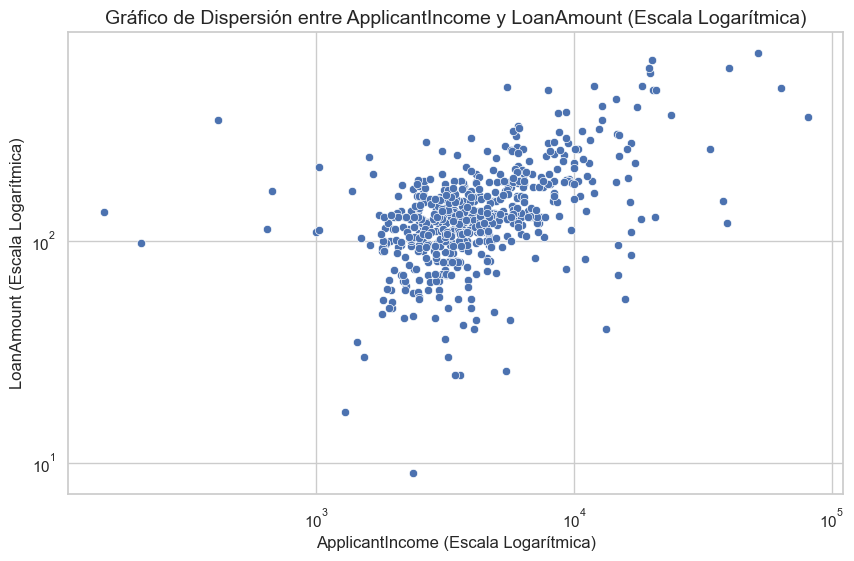

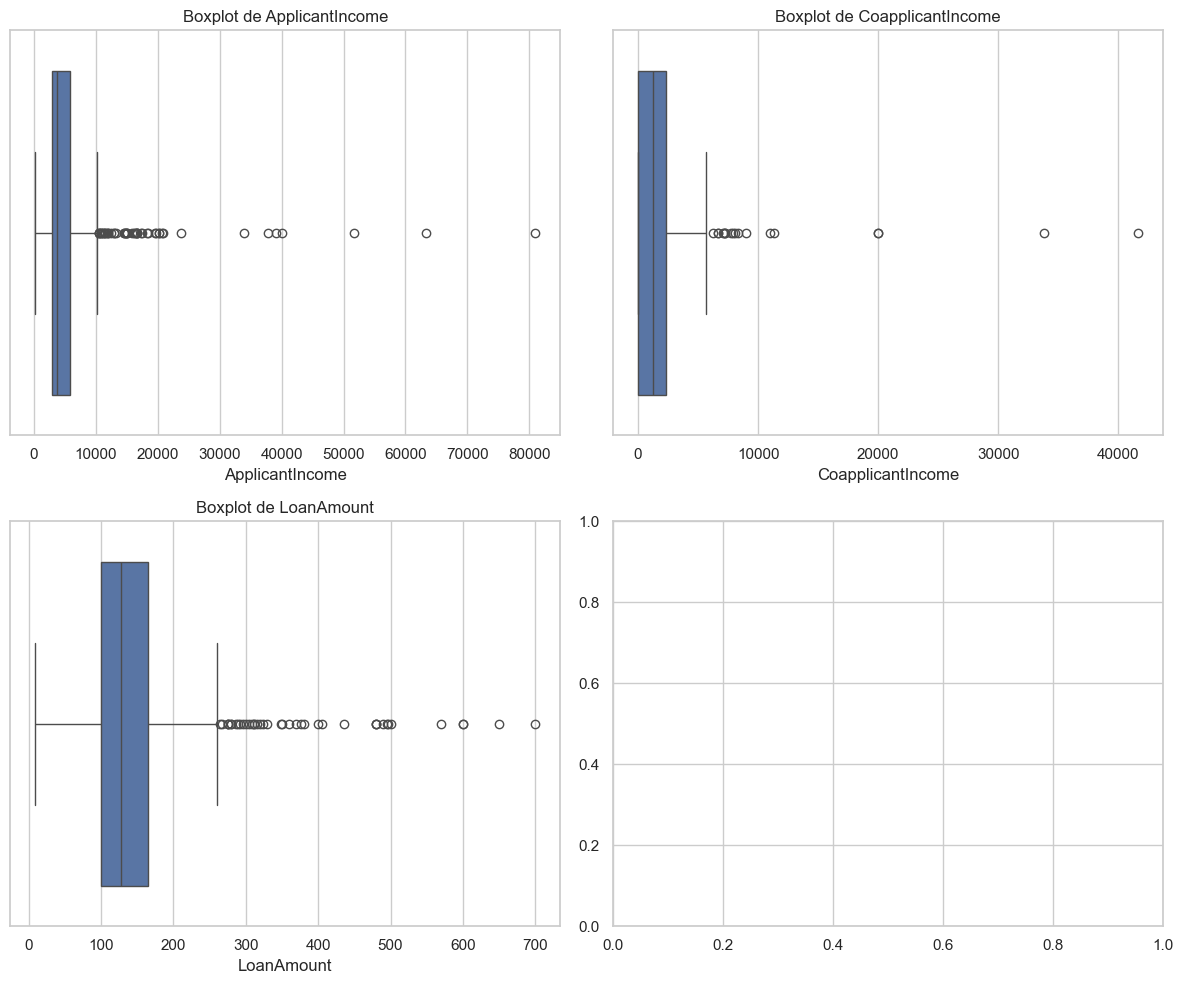

In [5]:
# Crear un mapa de calor para visualizar las correlaciones entre las variables numéricas
# Solo utilizamos las columnas numéricas para la correlación
plt.figure(figsize=(5, 4))
sns.heatmap(data[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Gráfico de dispersión para identificar posibles relaciones entre las variables (selección de las más significativas)
# Selección de las 2 variables más significativas para el scatterplot
sns.set(style="whitegrid")

# Gráfico de dispersión con escala logarítmica en ambos ejes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)

# Ajustar escala logarítmica si los datos tienen una distribución amplia
plt.xscale('log')
plt.yscale('log')

# Añadir etiquetas y título
plt.title('Gráfico de Dispersión entre ApplicantIncome y LoanAmount (Escala Logarítmica)', fontsize=14)
plt.xlabel('ApplicantIncome (Escala Logarítmica)', fontsize=12)
plt.ylabel('LoanAmount (Escala Logarítmica)', fontsize=12)

plt.show()

# Valores Faltantes y Outliers

# Detectar valores faltantes
valores_faltantes = data.isnull().sum()

# Tratar valores faltantes: Imputación con la media o mediana según el tipo de variable
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['int64', 'float64']:
            if data[col].skew() > 1:  # Si la variable es sesgada, usamos la mediana
                data[col] = data[col].fillna(data[col].median())
            else:
                data[col] = data[col].fillna(data[col].mean())
        else:
            # Para columnas categóricas, usamos la moda, pero primero verificamos que haya al menos un valor en mode()
            mode_value = data[col].mode()
            if not mode_value.empty:
                data[col] = data[col].fillna(mode_value[0])
            else:
                data[col] = data[col].fillna('Desconocido')  # Si no hay moda, usamos un valor predeterminado

# **Motivo**: 
# La imputación con la media o mediana se utiliza para manejar los valores faltantes en variables numéricas, según la distribución de los datos.
# Para variables categóricas, imputamos el valor más frecuente (moda), pero si no hay moda, asignamos un valor predeterminado.

# Identificar y manejar outliers utilizando boxplots (solo 4 sin Credit_History y Loan_Amount_Term)
fig, axes = plt.subplots(len(columnas_numericas_boxplots) // 2 + len(columnas_numericas_boxplots) % 2, 2, figsize=(12, 10))
axes = axes.flatten()

# Crear boxplots para cada columna numérica
for i, col in enumerate(columnas_numericas_boxplots):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 330, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 479, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

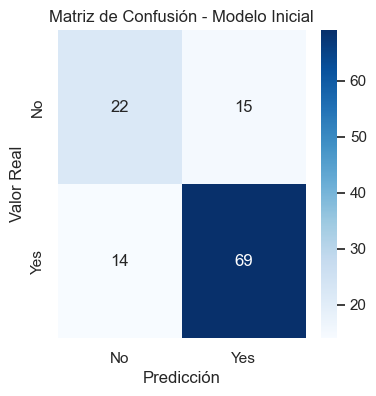

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 330, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 479, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

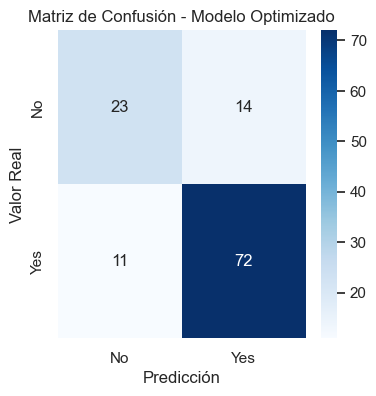


Comparación de Modelos:
Mejora en la Exactitud: 0.0333
Mejora en F1-Score: 0.0257


In [13]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identificar columnas por tipo
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = data.select_dtypes(include=['category']).columns
columnas_bool = data.select_dtypes(include=['bool']).columns

# Transformación de Columnas (solo si no se hizo previamente)

# 1. Codificar variables categóricas utilizando One-Hot Encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# 2. Escalar características numéricas utilizando StandardScaler
scaler = StandardScaler()
data_encoded[columnas_numericas] = scaler.fit_transform(data_encoded[columnas_numericas])

# División del Conjunto de Datos (Estratificación para balancear clases)
X = data_encoded.drop('Loan_Status', axis=1)  # Variables independientes
y = data_encoded['Loan_Status']  # Variable dependiente (target)

# Dividir en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Binarizar 'Loan_Status' si no está en formato binario
if y.nunique() > 2:
    # Usamos LabelEncoder si 'Loan_Status' tiene más de 2 clases
    le = LabelEncoder()
    y = le.fit_transform(y)

# Entrenamiento del Modelo

# Crear el modelo de LGBM con pesos de clase para manejar el desbalance y más complejidad
lgbm_model = lgb.LGBMClassifier(
    class_weight='balanced',  # Manejar desbalance de clases
    num_leaves=50,            # Aumentar el número de hojas para mayor complejidad
    max_depth=10,             # Aumentar la profundidad del árbol
    n_estimators=100,         # Aumentar el número de árboles
    learning_rate=0.05        # Ajustar la tasa de aprendizaje
)

# Entrenar el modelo con los datos de entrenamiento
lgbm_model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = lgbm_model.predict(X_test)

# Evaluación del modelo usando varias métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModelo Inicial - Métricas de Evaluación:")
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# ROC-AUC solo se puede calcular si ambas clases están presentes
if len(set(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC: {roc_auc:.4f}")
else:
    print("ROC-AUC no se puede calcular, ya que solo hay una clase presente.")

# Mostrar la matriz de confusión usando heatmap de seaborn
cm = confusion_matrix(y_test, y_pred)

# Crear un gráfico con la matriz de confusión
plt.figure(figsize=(4, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión - Modelo Inicial")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Optimización de Hiperparámetros usando GridSearchCV

# Definir los hiperparámetros a optimizar con un rango más amplio
param_grid = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Crear el GridSearchCV para optimizar los hiperparámetros
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Ejecutar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("\nMejores Hiperparámetros:", grid_search.best_params_)

# Evaluación del Modelo Optimizado

# Usar el modelo con los mejores hiperparámetros encontrados
best_model = grid_search.best_estimator_

# Hacer predicciones sobre el conjunto de prueba con el modelo optimizado
y_pred_optimized = best_model.predict(X_test)

# Evaluar el modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print("\nModelo Optimizado - Métricas de Evaluación:")
print(f"Exactitud: {accuracy_optimized:.4f}")
print(f"Precisión: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1-Score: {f1_optimized:.4f}")

# ROC-AUC solo se puede calcular si ambas clases están presentes
if len(set(y_test)) > 1:
    roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized)
    print(f"ROC-AUC: {roc_auc_optimized:.4f}")
else:
    print("ROC-AUC no se puede calcular, ya que solo hay una clase presente.")

# Mostrar la matriz de confusión para el modelo optimizado
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Crear un gráfico con la matriz de confusión del modelo optimizado
plt.figure(figsize=(4, 4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Comparación entre los dos modelos
print("\nComparación de Modelos:")
print(f"Mejora en la Exactitud: {accuracy_optimized - accuracy:.4f}")
print(f"Mejora en F1-Score: {f1_optimized - f1:.4f}")